# Welcome to Quito!

## Description

Automation in quantum software testing is essential to support systematic and cost-effective testing. Towards this direction, here we introduce a quantum software testing tool called Quito that can automatically generate test suites covering three coverage criteria defined on inputs and outputs of a quantum program coded in Qiskit, i.e., input coverage, output coverage, and input-output coverage. Quito also implements two types of test oracles based on program specifications, i.e., checking whether a quantum program produced a wrong output or checking a probabilistic test oracle with statistical test.

### Coverage Criteria
Users select one of three below coverage criteria to run Quito.
- Input Coverage
- Output Coverage
- Input-Output Coverage

### Test oracles
Quito evaluates the results according to the two test oracles that have been proposed in <a href="https://ieeexplore.ieee.org/abstract/document/9438603">this paper</a>:
- WOO: Whether an observed output is correct according to program specification. If not, the program is failed;
- OPO: If all the observed outputs corresponding to an input are valid, then it compares their observed probabilities with the ones specified in the Program Specification file. If the differences are statistically significant (i.e., a p-value lower than the chosen significance level), the program is failed.

## How to use Quito
Please prepare the **quantum program file** and the **configuration file**, then input them into the Quito tool. Here we introduce the example algorithm *Swap Test*, and the introduce the structure of the two input files.

### Example Algorithm Swap Test.

Let's take **Swap Test** algorithm as an example! This algorithm is used to check how much two quantum states differ.
The following shows the corresponding Qiskit code of this algorithm, including generating the visualized circuit diagram and execution result.

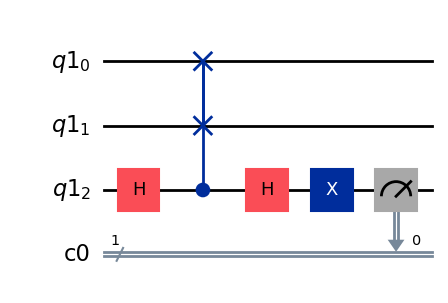

In [1]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator

q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(2)
qc.cswap(2, 0, 1)
qc.h(2)
qc.x(2)

qc.measure(2, 0)

qc.draw(output="mpl")

In [2]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts(qc)

{'1': 1024}

### Quantum Program File
Here we show the structure of this input file:
- The quantum program should be written with Qiskit in Python.
- The code has to be structured in a function named as 'run' with one parameter that refers to the quantum circuit.
- Users only need to add gates to the circuit and measure output qubits to get the output. They don't need to set any register, initialize circuits, choose the simulation, or execute the circuits in 'run' function.

### Example Quantum Program File
Here is the corresponding quantum program file of *SWAP.py* for Quito.

In [3]:
def run(qc):
    qc.h(2)
    qc.cswap(2, 0, 1)
    qc.h(2)
    qc.x(2)

    qc.measure(2, 0)

### Configuration File
Here we show the structure of this the program configuration file. It is an INI file, which contains four sections defined by headers enclosed in brackets [ ] and contains several properties represented by key-value pairs, called properties. This configuration file describes the program information, Quito execution information and program specification of the algorithm under test. Some properties are required and some properties are optional.

Here is the corresponding configuration file for **Swap Test** algorithm.

### Test with Quito Directly

Import quito and use quito method directly. The parameter is the absolute path of the configuration file.

In [10]:
from quito.quito_coverage import quito

quito("/home/user/configuration.ini")

We can check the process bar to see whether quito is running. After the whole process is finished, you can find the result file in a folder named **"result"**, which is located in the same directory of the **quantum program file**.

### Submit with by Slurm Job

Please first create an **executing file** and a **slurm file** to run the experiment.

Here is the executing file *quito_test.py*.

In [ ]:
import time

from quito.quito_coverage import quito

start = time.time()
i = 0
quito("/home/user/configuration.ini")
end = time.time()

print(end - start)

Here is the slurm file. It shows the configuration of running on a CPU node.

The following is the version of configuration file running on a GPU node.

Please prepare the following files before submitting to the eX3.

- quantum program file
- configuration file
- executing file
- slurm file

Run the following code to submit the job.

In [9]:
import os

command = "sbatch /home/user/quito.slurm"
os.system(command)

Submitted batch job 293033


0

It will print the job number after a successful submission. You can check the running statu by using the "squeue" command. After completing the execution, you can check the file *slurm-[job number].out* to know the the execution time. Result files can be found in the same directory of the quantum program file.